In [141]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn import model_selection
from sklearn.model_selection import KFold

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline

In [5]:
data = load_breast_cancer()

In [96]:
X,y = data.data,data.target

In [7]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [8]:
data.DESCR

'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 is Mean Rad

In [10]:
model = LogisticRegression()

In [11]:
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
model.coef_

array([[ 2.06662839,  0.10495124, -0.06178838, -0.00275815, -0.14955575,
        -0.39403464, -0.63119065, -0.33211252, -0.22007734, -0.0261762 ,
        -0.02940355,  1.21668229, -0.02698377, -0.08977716, -0.01641751,
         0.00481291, -0.04811354, -0.03936309, -0.04127676,  0.00589578,
         1.21398238, -0.32840819, -0.11598269, -0.02443232, -0.277363  ,
        -1.10397218, -1.54429359, -0.64022016, -0.67330168, -0.11105572]])

In [13]:
model.intercept_

array([ 0.37996671])

In [16]:
y_pred = model.predict(X)

In [17]:
model.predict_proba(X)[:5]

array([[  1.00000000e+00,   4.42482274e-15],
       [  9.99999978e-01,   2.20502493e-08],
       [  9.99999949e-01,   5.05068441e-08],
       [  4.79096820e-01,   5.20903180e-01],
       [  9.99989627e-01,   1.03728294e-05]])

In [19]:
accuracy_score(y,y_pred)

0.95957820738137078

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
accuracy_score(y_test,model.predict(X_test))

0.95744680851063835

In [28]:
for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)
    model = LogisticRegression()
    model.fit(X_train,y_train)
    print(accuracy_score(y_test,model.predict(X_test)))

0.957446808511
0.968085106383
0.957446808511
0.941489361702
0.957446808511
0.962765957447
0.941489361702
0.968085106383
0.968085106383
0.941489361702


In [30]:
cs = cross_val_score(LogisticRegression(),X,y,cv=10)

In [31]:
cs

array([ 0.94827586,  0.9137931 ,  0.92982456,  0.94736842,  0.96491228,
        0.98245614,  0.94736842,  0.94642857,  0.96428571,  0.96428571])

## Cross-validation (powiększeniz zbioru uczącego, sprawdzenie stabilności modelu)

In [32]:
cs.mean()

0.95089987900786443

In [33]:
cs.std()

0.018502455120465704

In [41]:
x = np.linspace(-1,1,100)
beta = np.array([-0.5,5.0])

In [43]:
prob = 1/ (1+np.exp(-beta[0] - beta[1]*x))
y = np.random.binomial(1,prob)

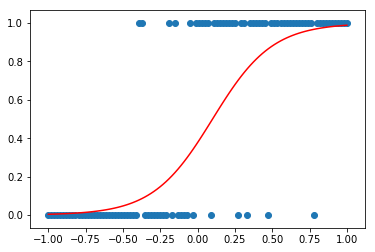

In [48]:
plt.plot(x,prob,'-r')
plt.scatter(x,y)
plt.show()

In [49]:
X = np.vstack([x**p for p in range(1,20)]).T

In [50]:
model = LogisticRegression(C = 1000000)
model.fit(X,y)

LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


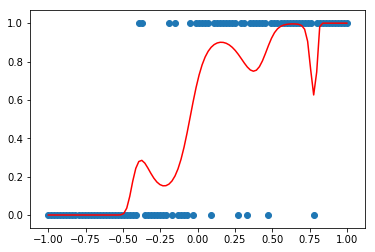

In [52]:
plt.plot(x,model.predict_proba(X)[:,1],'-r')
plt.scatter(x,y)
plt.show()

In [53]:
model.coef_

array([[  15.36439547,  -22.76834053, -169.7083256 ,  195.93944749,
         570.74464596, -455.25484581,  -19.20488847, -391.38815774,
        -120.92034067, -154.39003991,    1.24983712,   48.41899501,
         131.47670256,  171.0547837 ,  206.65714104,  222.9106082 ,
         229.17072041,  227.38745466,  217.60413578]])

In [54]:
model = LogisticRegression(C=1)
model.fit(X,y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

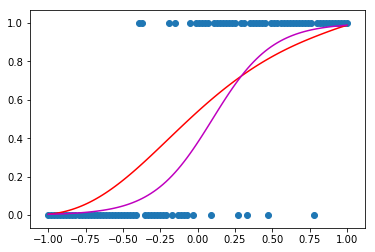

In [57]:
plt.plot(x,model.predict_proba(X)[:,1],'-r')
plt.scatter(x,y)
plt.plot(x,prob,'-m')
plt.show()

In [58]:
model.coef_

array([[  2.83186077e+00,  -4.67878559e-01,   8.12301984e-01,
         -2.16743705e-01,   3.85131324e-01,  -9.88493747e-02,
          2.36409198e-01,  -3.66065744e-02,   1.72738731e-01,
         -2.70676126e-03,   1.39648447e-01,   1.54940393e-02,
          1.18862563e-01,   2.47502336e-02,   1.03798644e-01,
          2.89046741e-02,   9.19281104e-02,   3.01995135e-02,
          8.21794272e-02]])

In [86]:
model = LogisticRegression(penalty='l2',C=1.0)
param_grid = {'C':[0.1,0.5,1.0]}
grid = GridSearchCV(model, 
                    param_grid,
                    cv=5,
                    refit = True)
grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.5, 1.0]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [87]:
grid.best_params_

{'C': 0.1}

In [88]:
best_model = grid.best_estimator_

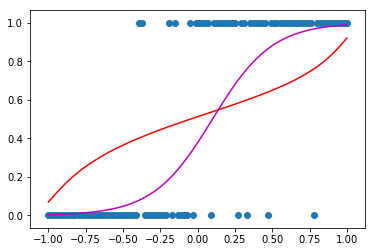

In [89]:
plt.plot(x,best_model.predict_proba(X)[:,1],'-r')
plt.scatter(x,y)
plt.plot(x,prob,'-m')
plt.show()

In [78]:
scaler = StandardScaler()

In [80]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [90]:
scaler.transform(X_train)
scaler.transform(X_test)

array([[-0.12359576,  0.97196557, -0.15880587, ..., -0.84345721,
        -0.39101411, -1.14322957],
       [ 0.41094619, -0.00713579,  0.31771651, ..., -0.4584852 ,
        -0.35744537, -0.86073429],
       [ 0.439685  , -1.22264886,  0.40087922, ...,  0.35023747,
        -0.2903079 , -0.72615977],
       ..., 
       [ 1.81052645,  0.45676645,  1.66911067, ...,  0.46125702,
        -1.10434976, -0.69501856],
       [-0.22418161,  0.24711832, -0.15464773, ...,  1.40883231,
         1.15650465,  1.50877831],
       [ 0.9828486 ,  0.8738324 ,  1.10776232, ...,  1.32283125,
        -0.99860824,  2.14828535]])

In [92]:
pipe = Pipeline([("standarization",StandardScaler()),
                ("logreg",LogisticRegression())])

In [93]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standarization', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [95]:
pipe.predict(X_test)[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [97]:
cross_val_score(pipe,X,y,cv=10)

array([ 0.98275862,  0.98275862,  0.98245614,  0.98245614,  0.98245614,
        0.98245614,  0.94736842,  1.        ,  1.        ,  0.98214286])

In [119]:
param_grid = {"penalty":["l1","l2"],
            'C': [0.1,0.5,1.0]}

gs = GridSearchCV(LogisticRegression(),
                 param_grid,
                 cv=2,
                 n_jobs = 2)
gs.fit(X_train,y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [120]:
gs.grid_scores_

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.90551, std: 0.02075, params: {'C': 0.1, 'penalty': 'l1'},
 mean: 0.91339, std: 0.01290, params: {'C': 0.1, 'penalty': 'l2'},
 mean: 0.91601, std: 0.01028, params: {'C': 0.5, 'penalty': 'l1'},
 mean: 0.92651, std: 0.01031, params: {'C': 0.5, 'penalty': 'l2'},
 mean: 0.92388, std: 0.00767, params: {'C': 1.0, 'penalty': 'l1'},
 mean: 0.93176, std: 0.00507, params: {'C': 1.0, 'penalty': 'l2'}]

In [121]:
best_model = gs.best_estimator_

In [122]:
accuracy_score(y_test,best_model.predict(X_test))

0.94148936170212771

In [123]:
gs.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [124]:
model = LogisticRegression(**gs.best_params_)

In [125]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
gs.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [132]:
pipe = Pipeline([("standarization",StandardScaler()),
                ("logreg",LogisticRegression())])

param_grid = {"standarization__with_mean":[True,False],
    "logreg__penalty":["l1","l2"],
            'logreg__C': [0.1,0.5,1.0]}

gs = GridSearchCV(pipe,
                 param_grid,
                 cv=2,
                 n_jobs = 2)


In [133]:
gs.fit(X_train,y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(steps=[('standarization', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'standarization__with_mean': [True, False], 'logreg__penalty': ['l1', 'l2'], 'logreg__C': [0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [135]:
best_pipeline = gs.best_estimator_

In [140]:
accuracy_score(best_pipeline.predict(X_test),y_test)

0.97340425531914898